In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("/content/NY-House-Dataset.csv")
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [ ]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
round(100*(data.isnull().sum()/len(data.index)),2)

,0
BROKERTITLE,0.0
TYPE,0.0
PRICE,0.0
BEDS,0.0
BATH,0.0
PROPERTYSQFT,0.0
ADDRESS,0.0
STATE,0.0
MAIN_ADDRESS,0.0
ADMINISTRATIVE_AREA_LEVEL_2,0.0


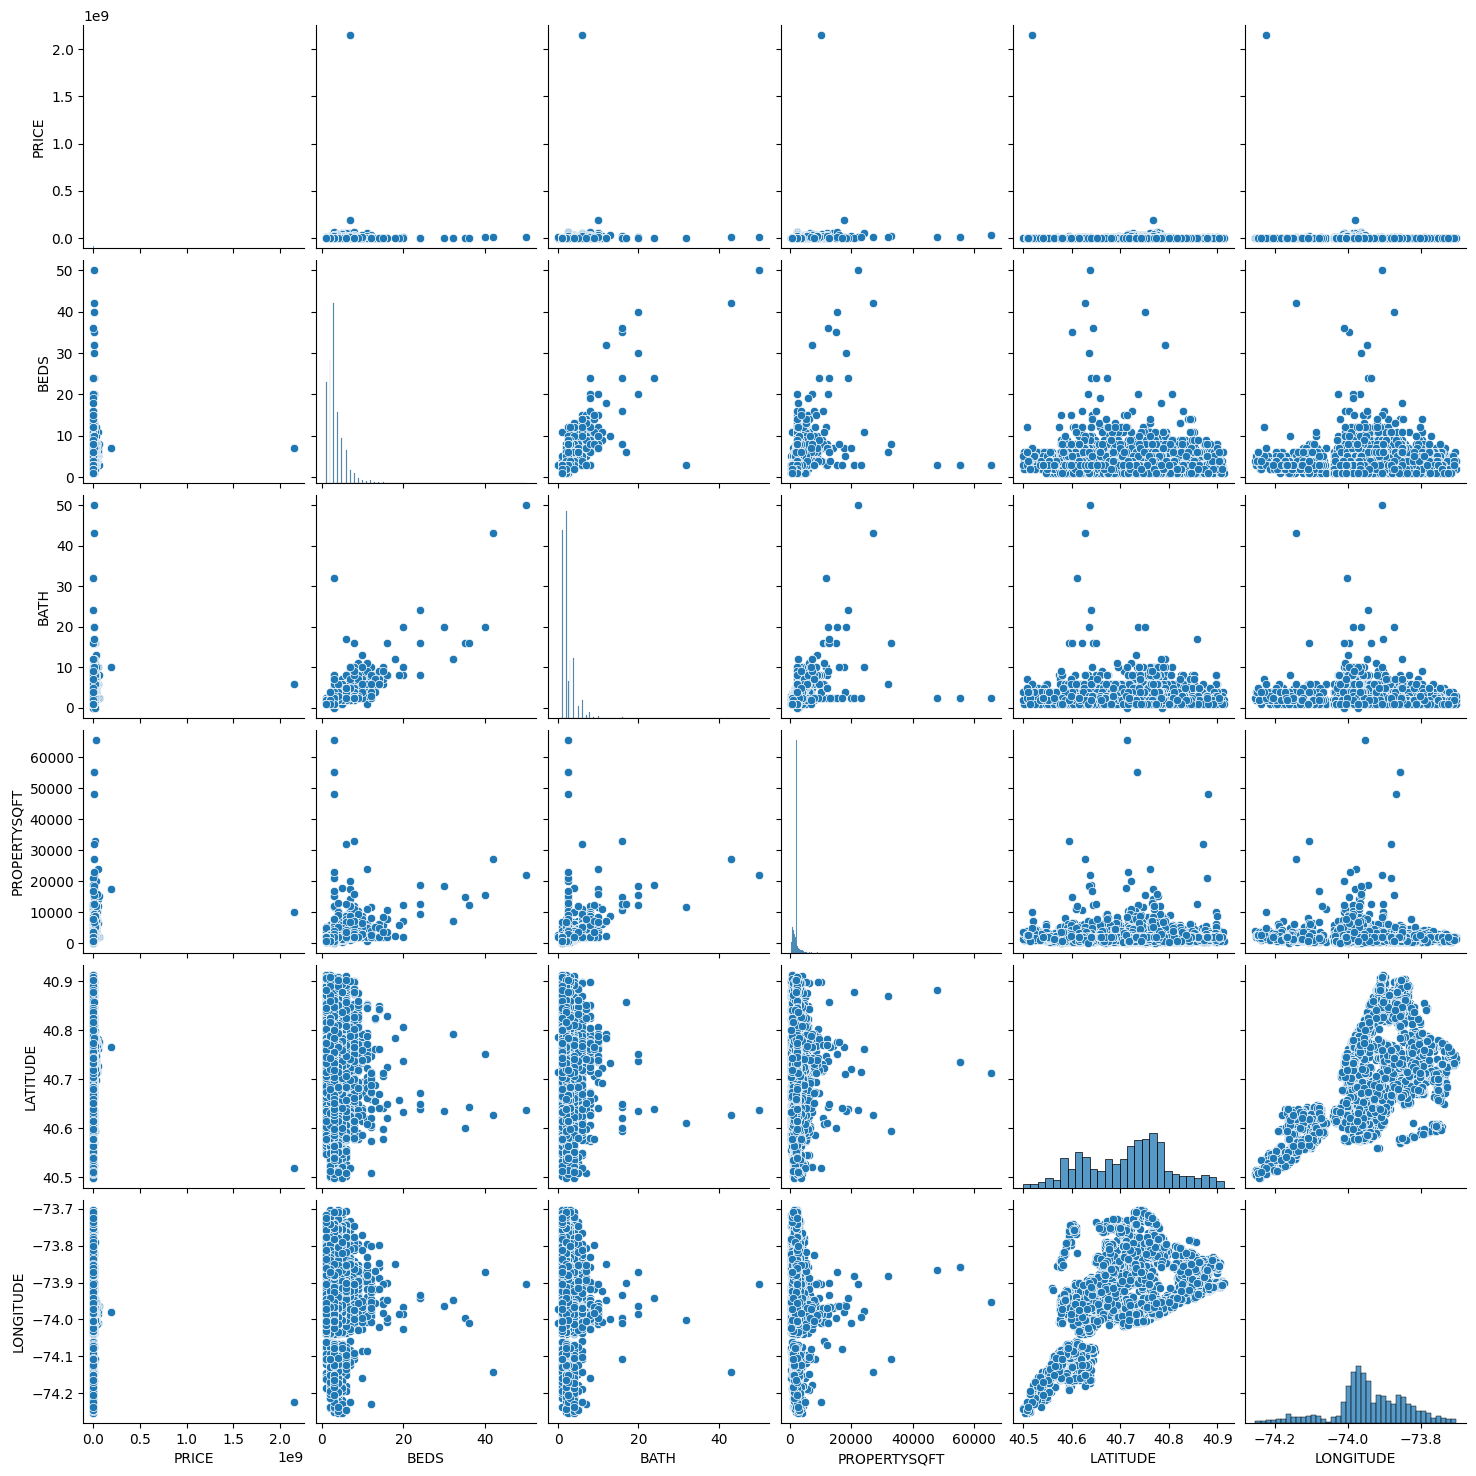

In [ ]:
sns.pairplot(data)

<Axes: ylabel='count'>

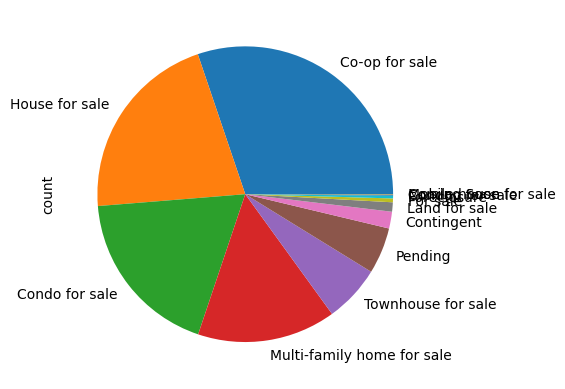

In [ ]:
(data["TYPE"].value_counts()).plot.pie()

<Axes: >

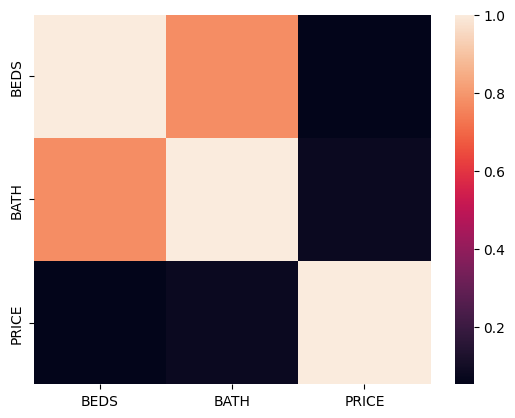

In [ ]:
num_vars = ["BEDS", "BATH", "PRICE"]
sns.heatmap(data[num_vars].corr())

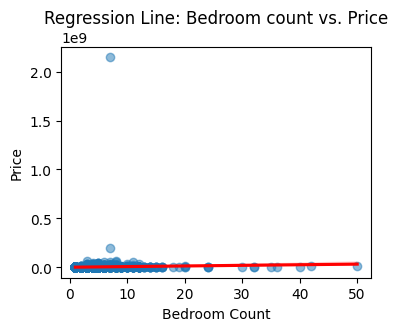

In [ ]:
plt.figure(figsize=(4, 3))
sns.regplot(x="BEDS", y="PRICE", data=data, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Regression Line: Bedroom count vs. Price")
plt.xlabel("Bedroom Count")
plt.ylabel("Price")
plt.show()

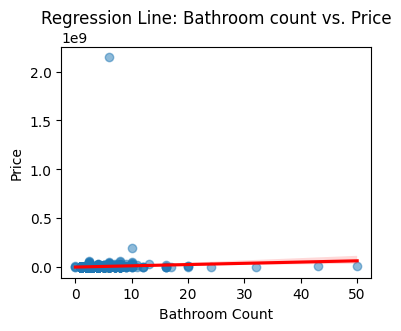

In [ ]:
plt.figure(figsize=(4, 3))
sns.regplot(x="BATH", y="PRICE", data=data, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Regression Line: Bathroom count vs. Price")
plt.xlabel("Bathroom Count")
plt.ylabel("Price")
plt.show()

<ipython-input-11-1a4012b6dec6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette="viridis")


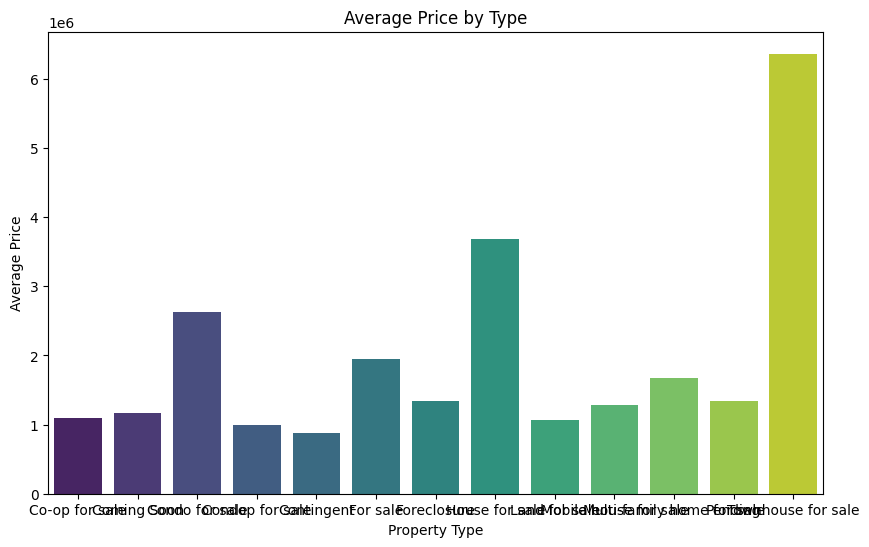

In [ ]:
avg_price_by_type = data.groupby('TYPE')['PRICE'].mean()
# Plot the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette="viridis")
plt.title("Average Price by Type")
plt.xlabel("Property Type")
plt.ylabel("Average Price")
plt.show()

Simple Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

def evaluate_regression(y, y_pred):

    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)

    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

In [ ]:
def print_feature_importances_random_forest(random_forest_model):

    # Fetch the feature importances and feature names
    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_

    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

In [ ]:
def print_feature_importances_shap_values(shap_values, features):
    from scipy.special import softmax
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))

    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
def evaluate_regression(y, y_pred):

    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)

    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

In [ ]:
from sklearn.model_selection import train_test_split
# Gets the independent variables
X = data[["BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]]
# Gets the dependent variable
y = data["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)

Regression result
MAE: 947392.11
MSE: 15894311291357.95
RMSE: 3986767.02
R2: 0.35


In [ ]:
# Prints the feature importances
print_feature_importances_random_forest(model)

PROPERTYSQFT -> 0.3697
LONGITUDE -> 0.2597
LATITUDE -> 0.2492
BATH -> 0.0660
BEDS -> 0.0554


Adding SHAP

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
shap_values

ExactExplainer explainer: 962it [01:26,  9.81it/s]


.values =
array([[  -18056.61037784, -2095669.6703649 , -1061904.04706936,
          210788.84205391,   962320.03011581],
       [  -38609.93393387,   377803.91364113,  -464746.28811411,
         -934619.74575721, -1364336.88147832],
       [   -9831.87229319,  -884834.90104788,  -840282.94744032,
        -1276244.343292  ,   606275.10843101],
       ...,
       [ -120450.48298231,  -940643.9952208 , -1047485.06700106,
          461415.78238268,  -912564.1028209 ],
       [  -55643.40787825, -1110407.99947008,  -769611.70126889,
          508679.31384198,  -942378.92086714],
       [ -344243.65408169,  -783348.05377733, -1332880.62806413,
          377768.67691305,   993375.82336771]])

.base_values =
array([2897307.83564238, 2897307.83564238, 2897307.83564238,
       2897307.83564238, 2897307.83564238, 2897307.83564238,
       2897307.83564238, 2897307.83564238, 2897307.83564238,
       2897307.83564238, 2897307.83564238, 2897307.83564238,
       2897307.83564238, 2897307.83564238, 28

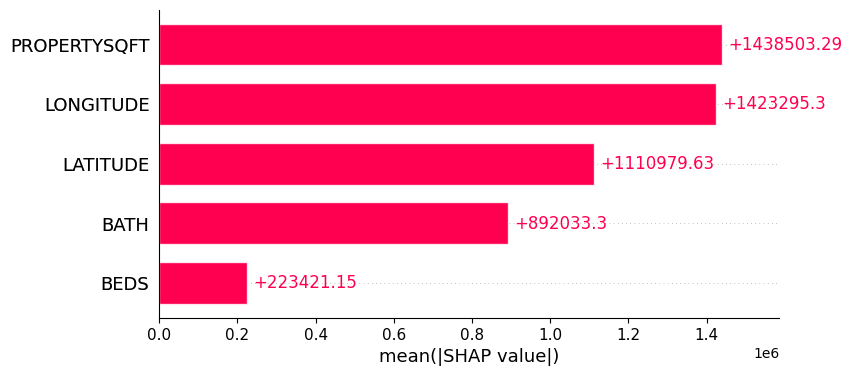

In [ ]:
# Plots this view
shap.plots.bar(shap_values)

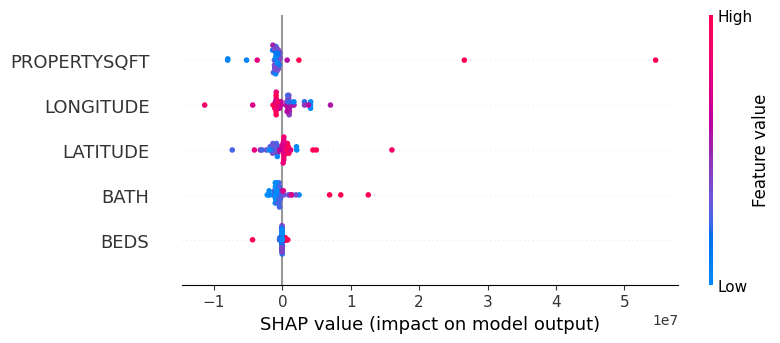

In [ ]:
# Plots the beeswarm
shap.plots.beeswarm(shap_values.sample(50))

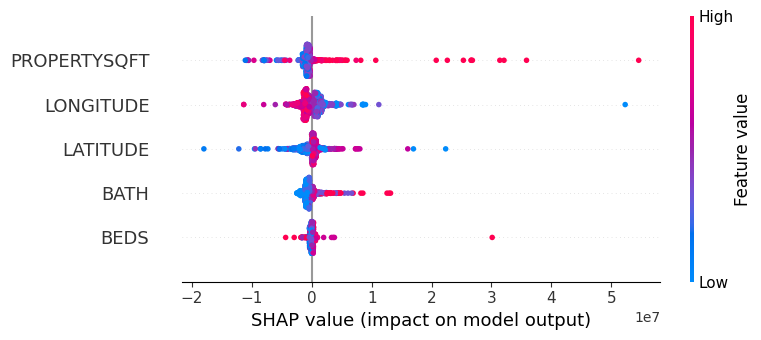

In [ ]:
shap.summary_plot(shap_values)

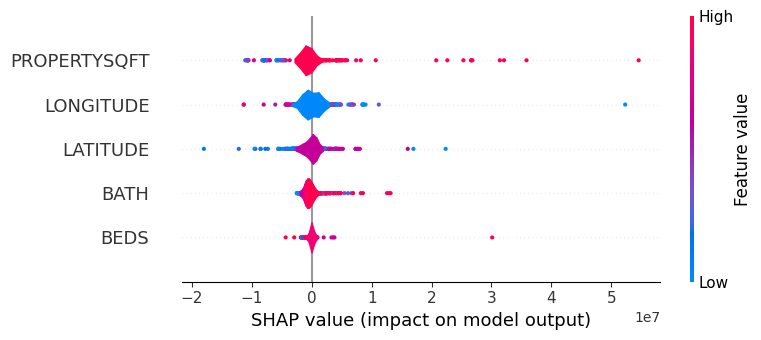

In [ ]:
# Violin plot
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
# Prints the SHAP feature importances
print_feature_importances_shap_values(shap_values, X_test.columns)

PROPERTYSQFT -> 1438503.2930 (softmax = 1.0000)
LONGITUDE -> 1423295.2998 (softmax = 0.0000)
LATITUDE -> 1110979.6312 (softmax = 0.0000)
BATH -> 892033.3021 (softmax = 0.0000)
BEDS -> 223421.1505 (softmax = 0.0000)


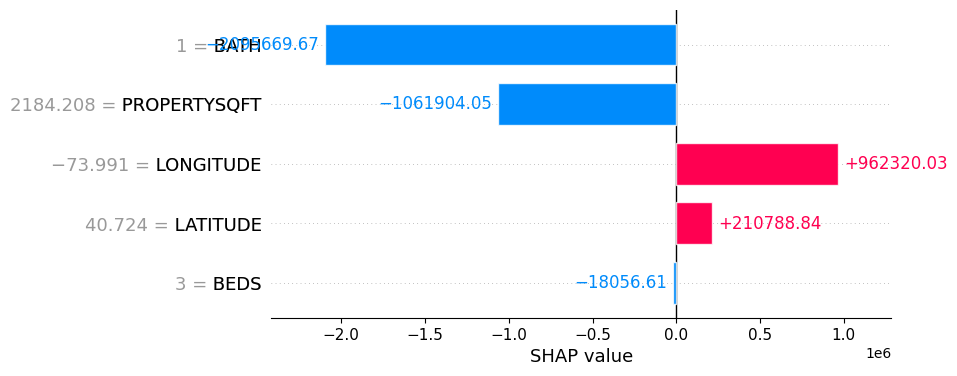

In [ ]:
shap.plots.bar(shap_values[0])

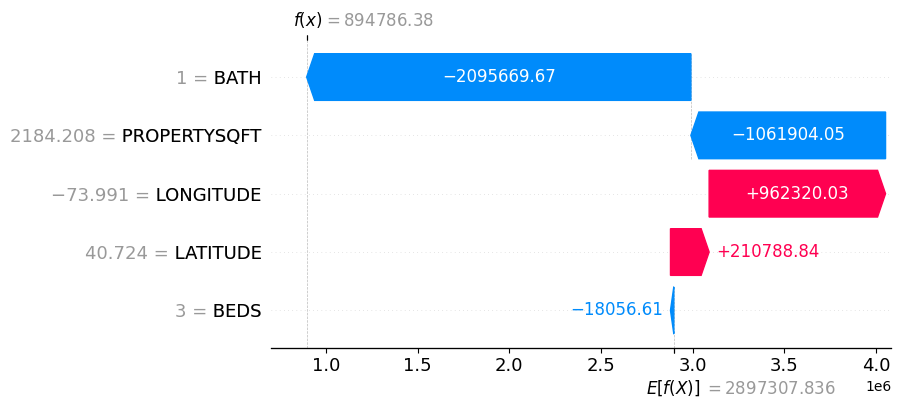

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10)

In [53]:
shap.initjs()
shap.plots.force(shap_values[0])